In [1]:
import pandas as pd
from pathlib import Path

In [2]:
df = pd.read_excel(sorted(Path('data').glob('*.xls'))[0], header=2)

cause_ids = df[df.columns[1]].tolist()
cause_names = df[df.columns[2]].tolist()

hosp_cause_id_map = {k : v for k, v in zip(cause_ids, cause_names) if 'U' in str(k) and k not in ['U40Z', 'U60Z']}

print(hosp_cause_id_map)

{'U61A': 'Shizofreni poremećaji - prisilno liječenje', 'U61B': 'Shizofreni poremećaji - liječenje vlastitom voljom', 'U62A': 'Paranoja i akutni psihotični poremećaj s vrlo teškim ili teškim KK ili prisilno liječenje', 'U62B': 'Paranoja i akutni psihotični poremećaj bez vrlo teških ili teških KK', 'U63A': 'Veliki afektivni poremećaji, dob > 69 godina, ili s vrlo teškim ili teškim KK', 'U63B': 'Veliki afektivni poremećaji, dob < 70 godina, bez vrlo teških ili teških KK', 'U64Z': 'Ostali afektivni i somatoformni poremećaji', 'U65Z': 'Anksiozni poremećaji', 'U66Z': 'Poremećaji hranjenja i opsesivno-kompulzivni poremećaji', 'U67Z': 'Poremećaji osobnosti i akutne reakcije', 'U68Z': 'Mentalni poremećaji u dječjoj dobi'}


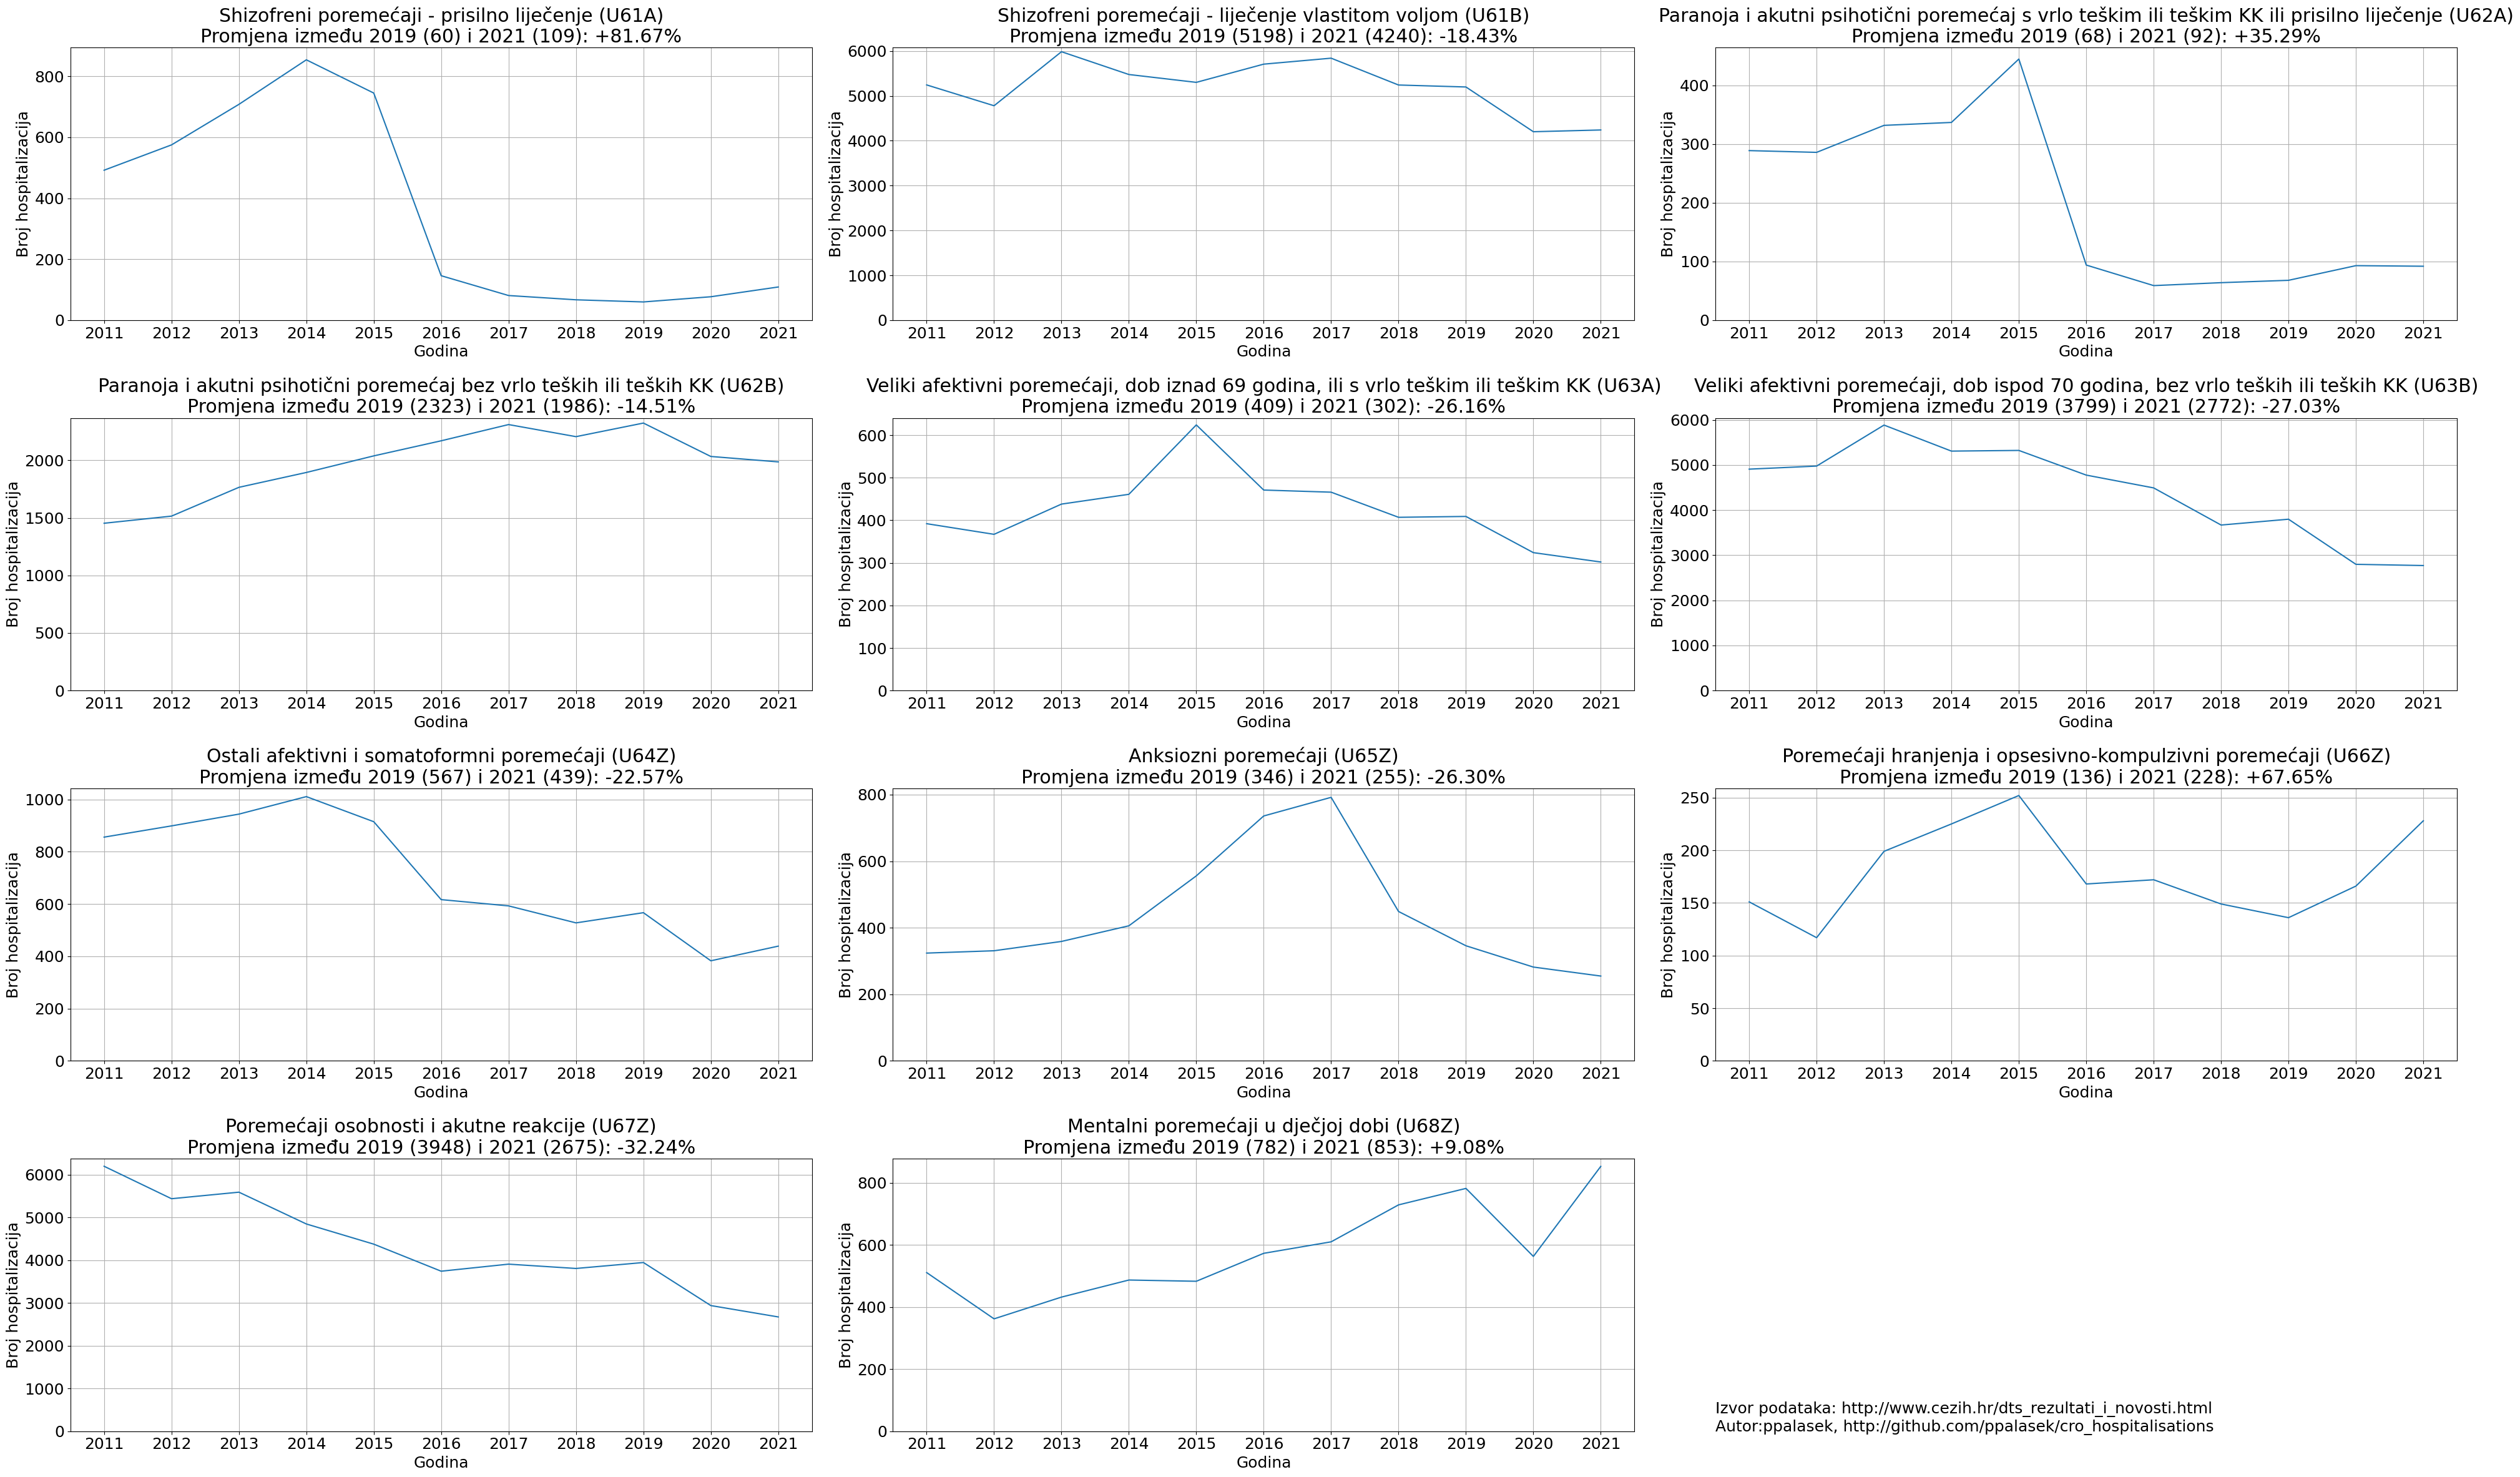

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rc('font', size=18) 

cols = 3
rows = round(len(hosp_cause_id_map) / cols)

fig, axs = plt.subplots(rows, cols, figsize=(40, 6 * rows), dpi=100)


for i, (hosp_cause_id, hosp_cause) in enumerate(hosp_cause_id_map.items()):
    hospitals = {}

    row = i // cols
    col = i % cols
    
    for x in sorted(Path('data').glob('*.xls')):    
        df = pd.read_excel(x, header=2)

        year = int(str(x.name).split('_')[0])

        selection = df.loc[df[df.columns[1]] == hosp_cause_id]

        for hosp_name in selection.columns[3:]:        
            val = round(float((str(selection[hosp_name].tolist()[0]).replace('nan', '0'))))

            if hosp_name not in hospitals:
                hospitals[hosp_name] = {}
            else:
                hospitals[hosp_name][year] = val
    
    total_per_year = {}
    
    for year in range(2011, 2022):
        if year not in total_per_year:
            total_per_year[year] = 0

        for hosp_name in hospitals:
            if year in hospitals[hosp_name]:
                total_per_year[year] += hospitals[hosp_name][year]

    axs[row][col].plot(range(2011, 2022), list(total_per_year.values()))

    axs[row][col].grid('on')

    
    axs[row][col].set_ylim(bottom=0)
    axs[row][col].set_xticks(range(2011, 2022))
    axs[row][col].set_xlabel('Godina')
    axs[row][col].set_ylabel('Broj hospitalizacija')
    
    change = (total_per_year[2021] / total_per_year[2019] - 1) * 100
    
    axs[row][col].set_title('{} ({})\nPromjena između 2019 ({}) i 2021 ({}): {:+.2f}%'.format(hosp_cause.replace('<', 'ispod').replace('>', 'iznad'), hosp_cause_id, total_per_year[2019], total_per_year[2021], change))
    
    
plt.tight_layout()


axs[3][2].axis('off')
axs[3][2].text(0, 0, 'Izvor podataka: http://www.cezih.hr/dts_rezultati_i_novosti.html\nAutor:ppalasek, http://github.com/ppalasek/cro_hospitalisations')


plt.savefig('img/hospitalisations.png', dpi=50, bbox_inches='tight', pad_inches=0.0, facecolor='white')

plt.show()

